# Feature engineering with pandas

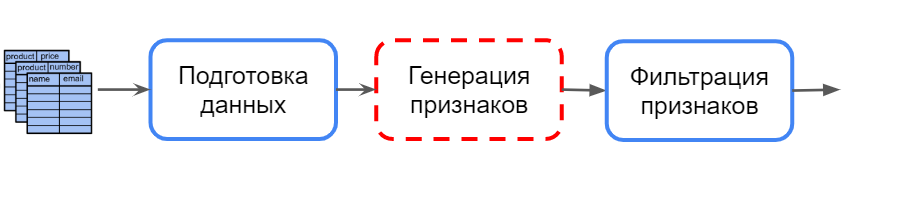

## Apply

In [1]:
import pandas as pd

url = 'https://drive.google.com/uc?id=1eqFIZCJTkXY-PsTeS-uz_DousIH3XQu-'  
rides = pd.read_csv(url) # Открываем rides_info - информация про поездки
rides.sample(5)

,user_id,car_id,ride_id,ride_date,rating,ride_duration,ride_cost,speed_avg,speed_max,stop_times,distance,refueling,user_ride_quality,deviation_normal
628819,S98334709L,s-9164758n,Z1j,2020-03-24,3.76,49,681,67,123.143338,0,3374.952864,0,-9.886540,-8.290
342379,c10693090r,Y11021530E,D1I,2020-03-05,5.27,59,820,38,47.000000,1,1274.660986,0,-5.805487,1.960
394389,q16181094s,b53350458l,e1p,2020-02-25,0.10,33,325,44,89.401075,2,1172.670274,0,-0.587781,-2.040
93788,a39609448b,G62487539y,c1A,2020-01-02,0.53,5,75,31,52.000000,0,128.133563,0,-1.360817,3.441
337551,m21011956K,Y-1269300M,O1r,2020-03-28,5.37,33,458,32,65.000000,1,1030.317106,0,-14.629375,-47.933


In [2]:
def f(x):
    if x > 30:
        return "more_30"
    return "no_more_30"

In [3]:
rides['speed_avg_greater_30'] = rides['speed_avg'].apply(f)

In [4]:
rides.speed_avg_greater_30.value_counts()

more_30       699420
no_more_30     40080
Name: speed_avg_greater_30, dtype: int64

## Apply в несколько столбцов

In [5]:
def A_dev_B(x):
    return x['speed_avg'] / x['speed_max']

rides['new_feature'] = rides.apply(A_dev_B, axis=1)

In [6]:
rides.head()

,user_id,car_id,ride_id,ride_date,rating,ride_duration,ride_cost,speed_avg,speed_max,stop_times,distance,refueling,user_ride_quality,deviation_normal,speed_avg_greater_30,new_feature
0,o52317055h,A-1049127W,b1v,2020-01-01,4.95,21,268,36,113.548538,0,514.246920,0,1.115260,2.909,more_30,0.317045
1,H41298704y,A-1049127W,T1U,2020-01-01,6.91,8,59,36,93.000000,1,197.520662,0,1.650465,4.133,more_30,0.387097
2,v88009926E,A-1049127W,g1p,2020-01-02,6.01,20,315,61,81.959675,0,1276.328206,0,2.599112,2.461,more_30,0.744268
3,t14229455i,A-1049127W,S1c,2020-01-02,0.26,19,205,32,128.000000,0,535.680831,0,3.216255,0.909,more_30,0.250000
4,W17067612E,A-1049127W,X1b,2020-01-03,1.21,56,554,38,90.000000,1,1729.143367,0,2.716550,-1.822,more_30,0.422222


In [7]:
path = "https://stepik.org/media/attachments/lesson/779916/stepik_rides.csv"
df = pd.read_csv(path)


In [8]:
def f_final_ride_cost(x):
    if x['rating'] > 6 and x['speed_max'] < 120:
        ride_cost = x['ride_cost'] * 0.95
    else:
        ride_cost = x['ride_cost'] * 1.05
    return int(ride_cost)
    

df['final_ride_cost'] = df.apply(f_final_ride_cost, axis=1)

# GroupBy

In [9]:
cols = ["rating", "ride_duration", "ride_cost"]

rides_gr = rides.groupby("car_id", as_index=False)[cols].mean()

rides_gr.head()

,car_id,rating,ride_duration,ride_cost
0,A-1049127W,4.255172,1289.034483,15201.436782
1,A-1079539w,4.088046,2148.810345,27007.477011
2,A-1162143G,4.662299,479.017241,4599.678161
3,A-1228282M,4.225172,2167.534483,27379.522989
4,A-1339912r,4.690115,1436.614943,16185.545977


## Groupby + aggregation

In [10]:
cols = ["rating", "ride_cost"]

rides_info_gr = rides.groupby("car_id", as_index=False)[cols].agg(["count", "mean"])

In [11]:
rides_info_gr

rating           ride_cost              
            count      mean     count          mean
car_id                                             
A-1049127W    174  4.255172       174  15201.436782
A-1079539w    174  4.088046       174  27007.477011
A-1162143G    174  4.662299       174   4599.678161
A-1228282M    174  4.225172       174  27379.522989
A-1339912r    174  4.690115       174  16185.545977
...           ...       ...       ...           ...
z73688663a    174  4.808448       174  15567.178161
z73740510r    174  4.699655       174  12388.580460
z86911952C    174  4.430977       174  26997.166667
z91353693Z    174  5.326092       174  27787.040230
z91796444U    174  4.307471       174   9667.344828

[4250 rows x 4 columns]

In [12]:
# Убираем мультииндекс
rides_info_gr.columns = ["_".join(c) for c in rides_info_gr.columns]

# Смотрим результаты (car_id теперь не столбец, а индекс)
rides_info_gr.head()

,rating_count,rating_mean,ride_cost_count,ride_cost_mean
car_id,,,,
A-1049127W,174,4.255172,174,15201.436782
A-1079539w,174,4.088046,174,27007.477011
A-1162143G,174,4.662299,174,4599.678161
A-1228282M,174,4.225172,174,27379.522989
A-1339912r,174,4.690115,174,16185.545977


In [13]:
my_func = lambda x: int(max(x) - min(x))
rides_gr = rides.groupby("car_id", as_index=False).agg(
    rating_mean=("rating", "mean"),
    ride_duration_sum=("ride_duration", sum),
    ride_cost_max=("ride_cost", "max"),
    my_func_result=("speed_max", my_func)
)

ValueError: cannot convert float NaN to integer

In [14]:
from heapq import nlargest
import numpy as np
count_unique = lambda x: len(set(x))
take_second_max = lambda x: nlarges(2, x)[1]
div = lambda x: min(x) / max(x)
moda = lambda x: pd.Series.value_counts(x)[0]
result = df.groupby("car_id", as_index=False).agg(
    feature_1 = ("stop_times", count_unique),
    feature_2 = ("speed_max", take_second_max),
    feature_3 = ("rating", div),
    feature_4 = ("stop_times", moda),
    feature_5 = ("ride_cost", np.std)
)

KeyError: 0

In [ ]:
rides

,user_id,car_id,ride_id,ride_date,rating,ride_duration,ride_cost,speed_avg,speed_max,stop_times,distance,refueling,user_ride_quality,deviation_normal,speed_avg_greater_30,new_feature
0,o52317055h,A-1049127W,b1v,2020-01-01,4.95,21,268,36,113.548538,0,514.246920,0,1.115260,2.909,more_30,0.317045
1,H41298704y,A-1049127W,T1U,2020-01-01,6.91,8,59,36,93.000000,1,197.520662,0,1.650465,4.133,more_30,0.387097
2,v88009926E,A-1049127W,g1p,2020-01-02,6.01,20,315,61,81.959675,0,1276.328206,0,2.599112,2.461,more_30,0.744268
3,t14229455i,A-1049127W,S1c,2020-01-02,0.26,19,205,32,128.000000,0,535.680831,0,3.216255,0.909,more_30,0.250000
4,W17067612E,A-1049127W,X1b,2020-01-03,1.21,56,554,38,90.000000,1,1729.143367,0,2.716550,-1.822,more_30,0.422222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739495,I15732675M,z91796444U,m1z,2020-03-30,7.42,164,2290,49,54.586302,0,2274.772387,0,6.137593,-39.752,more_30,0.897661
739496,r51579957X,z91796444U,t1P,2020-03-30,4.19,26,412,46,73.000000,0,515.580231,0,6.703367,-38.480,more_30,0.630137
739497,l15212727I,z91796444U,z1A,2020-03-31,3.40,23,178,37,71.000000,1,444.846677,0,6.255344,-45.080,more_30,0.521127
739498,Z78949958q,z91796444U,w1R,2020-04-01,9.02,5,75,48,87.000000,1,179.464361,0,7.759949,-60.193,more_30,0.551724


In [ ]:
result.feature_1.value_counts()

4     2356
5     1070
19     262
18     258
20     122
17     111
16      36
21      18
6        7
3        6
15       3
22       1
Name: feature_1, dtype: int64

In [28]:
import seaborn as sns
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier

In [31]:
train = pd.read_csv('https://stepik.org/media/attachments/lesson/779914/fen_train.csv')
test = pd.read_csv('https://stepik.org/media/attachments/lesson/779914/fen_test.csv')

In [32]:
test

,signal_id,p1,p2,p3,p4,p5,p6,p7,p8,p9,...,p119,p120,p121,p122,p123,p124,p125,p126,p127,p128
0,0,0.048383,0.075671,0.085861,0.087598,0.133466,0.239305,0.324572,0.264262,0.129173,...,0.138940,0.256082,0.344688,0.252258,0.034918,-0.141454,-0.132326,0.092708,0.290870,0.305827
1,1,0.092534,0.209535,0.390794,0.442508,0.429571,0.451524,0.310780,-0.075440,-0.297661,...,0.187563,0.234320,0.270503,0.328785,0.347625,0.426766,0.299061,-0.060183,-0.177051,-0.083738
2,8,0.045240,0.182892,0.293203,0.367133,0.341595,0.315698,0.343855,0.301613,0.243359,...,0.368040,0.290899,0.207095,0.242306,0.259203,0.210387,0.212587,0.076684,-0.203899,-0.346122
3,9,0.182414,-0.337581,-0.080484,0.393137,0.373783,0.112220,-0.219613,-0.355965,-0.302890,...,0.127023,0.275310,0.192306,0.073698,0.243584,0.276032,0.238793,0.275950,0.256591,0.360451
4,10,0.378236,0.137916,-0.063737,-0.201264,-0.067326,0.127712,0.221648,0.257548,0.093588,...,-0.202586,0.001186,0.190594,0.253443,0.168408,0.025194,-0.048555,-0.190483,-0.387497,-0.387843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,1216,-0.271647,-0.279556,-0.261024,-0.240678,-0.198738,-0.050845,0.187136,0.400810,0.466261,...,0.432804,0.430316,0.360257,0.128453,-0.081609,-0.308643,-0.311576,-0.065489,-0.087348,-0.105786
428,1217,0.437164,0.127592,-0.304225,-0.488055,-0.278895,-0.020672,0.125794,0.113607,-0.144910,...,0.460892,0.331173,-0.004532,-0.298237,-0.354807,-0.211790,-0.045861,0.074650,0.046221,-0.131905
429,1223,-0.133246,-0.132675,-0.155113,-0.079316,-0.035889,0.006239,0.001766,-0.040629,0.009979,...,-0.123037,-0.088129,-0.046241,-0.026337,0.024571,0.029573,0.044202,0.117704,0.276104,0.383572
430,1224,-0.126366,-0.189592,-0.112701,-0.136277,-0.137174,-0.033034,0.029840,0.017674,-0.019952,...,-0.038111,-0.028967,-0.025562,-0.046228,-0.069375,-0.064908,-0.053884,-0.005577,0.110611,0.214029


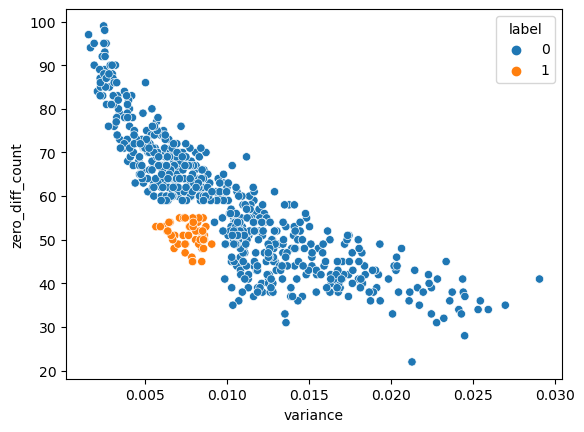

In [33]:
# расчет дисперсии ряда
train['variance'] = np.gradient(train.iloc[:, 1:129])[1].var(axis=1)

# расчет числа нулевых производных ряда с произвольным пороговым значением
threshold_zero_diff = 0.05
diffs_train = train.iloc[:, 1:129].diff(axis=1)
train['zero_diff_count'] = np.sum(np.abs(diffs_train) < threshold_zero_diff, axis=1)

# рассеивание признаков
sns.scatterplot(data=train, x='variance', y='zero_diff_count', hue='label');

In [34]:
# расчет trainдисперсии ряда
test['variance'] = np.gradient(test.iloc[:, 1:129])[1].var(axis=1)

# расчет числа нулевых производных ряда с произвольным пороговым значением
threshold_zero_diff = 0.05
diffs_test = test.iloc[:, 1:129].diff(axis=1)
test['zero_diff_count'] = np.sum(np.abs(diffs_test) < threshold_zero_diff, axis=1)

In [36]:
cat = CatBoostClassifier()
cat.fit(X=train.drop(columns=['label']), y=train.label)

/nix/store/j99xhqi60cykwj3ysrz556ayskvkmapr-python3.10-catboost-1.0.5/lib/python3.10/site-packages/catboost/core.py:1325: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight,


Learning rate set to 0.008594
0:	learn: 0.6841922	total: 93.7ms	remaining: 1m 33s
1:	learn: 0.6715168	total: 121ms	remaining: 1m
2:	learn: 0.6627338	total: 149ms	remaining: 49.5s
3:	learn: 0.6542558	total: 182ms	remaining: 45.4s
4:	learn: 0.6444764	total: 226ms	remaining: 45s
5:	learn: 0.6361100	total: 263ms	remaining: 43.5s
6:	learn: 0.6280720	total: 302ms	remaining: 42.9s
7:	learn: 0.6200349	total: 343ms	remaining: 42.5s
8:	learn: 0.6120541	total: 388ms	remaining: 42.7s
9:	learn: 0.6045348	total: 428ms	remaining: 42.3s
10:	learn: 0.5969722	total: 469ms	remaining: 42.1s
11:	learn: 0.5898744	total: 510ms	remaining: 42s
12:	learn: 0.5829572	total: 540ms	remaining: 41s
13:	learn: 0.5759278	total: 571ms	remaining: 40.2s
14:	learn: 0.5692390	total: 601ms	remaining: 39.5s
15:	learn: 0.5616155	total: 631ms	remaining: 38.8s
16:	learn: 0.5551416	total: 676ms	remaining: 39.1s
17:	learn: 0.5490342	total: 711ms	remaining: 38.8s
18:	learn: 0.5430468	total: 745ms	remaining: 38.5s
19:	learn: 0.53661

In [38]:
test['label'] = cat.predict(test)

/nix/store/j99xhqi60cykwj3ysrz556ayskvkmapr-python3.10-catboost-1.0.5/lib/python3.10/site-packages/catboost/core.py:1325: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight,


In [39]:
test

,signal_id,p1,p2,p3,p4,p5,p6,p7,p8,p9,...,p122,p123,p124,p125,p126,p127,p128,variance,zero_diff_count,label
0,0,0.048383,0.075671,0.085861,0.087598,0.133466,0.239305,0.324572,0.264262,0.129173,...,0.252258,0.034918,-0.141454,-0.132326,0.092708,0.290870,0.305827,0.006652,65,0
1,1,0.092534,0.209535,0.390794,0.442508,0.429571,0.451524,0.310780,-0.075440,-0.297661,...,0.328785,0.347625,0.426766,0.299061,-0.060183,-0.177051,-0.083738,0.009245,55,0
2,8,0.045240,0.182892,0.293203,0.367133,0.341595,0.315698,0.343855,0.301613,0.243359,...,0.242306,0.259203,0.210387,0.212587,0.076684,-0.203899,-0.346122,0.007690,55,1
3,9,0.182414,-0.337581,-0.080484,0.393137,0.373783,0.112220,-0.219613,-0.355965,-0.302890,...,0.073698,0.243584,0.276032,0.238793,0.275950,0.256591,0.360451,0.019799,35,0
4,10,0.378236,0.137916,-0.063737,-0.201264,-0.067326,0.127712,0.221648,0.257548,0.093588,...,0.253443,0.168408,0.025194,-0.048555,-0.190483,-0.387497,-0.387843,0.010600,47,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,1216,-0.271647,-0.279556,-0.261024,-0.240678,-0.198738,-0.050845,0.187136,0.400810,0.466261,...,0.128453,-0.081609,-0.308643,-0.311576,-0.065489,-0.087348,-0.105786,0.008615,70,0
428,1217,0.437164,0.127592,-0.304225,-0.488055,-0.278895,-0.020672,0.125794,0.113607,-0.144910,...,-0.298237,-0.354807,-0.211790,-0.045861,0.074650,0.046221,-0.131905,0.013738,43,0
429,1223,-0.133246,-0.132675,-0.155113,-0.079316,-0.035889,0.006239,0.001766,-0.040629,0.009979,...,-0.026337,0.024571,0.029573,0.044202,0.117704,0.276104,0.383572,0.007884,61,0
430,1224,-0.126366,-0.189592,-0.112701,-0.136277,-0.137174,-0.033034,0.029840,0.017674,-0.019952,...,-0.046228,-0.069375,-0.064908,-0.053884,-0.005577,0.110611,0.214029,0.002286,88,0


In [40]:
test[['signal_id', 'label']].to_csv('pred.csv', index=False)

In [18]:
train

,signal_id,p1,p2,p3,p4,p5,p6,p7,p8,p9,...,p123,p124,p125,p126,p127,p128,label,variance,zero_diff_count,label_pred
0,3,-0.177789,-0.081874,-0.096131,-0.099436,-0.098867,-0.105427,-0.083472,-0.074000,-0.065275,...,0.009359,0.009645,0.070163,0.108443,0.127638,0.099169,0,0.008070,70,0
1,4,0.010337,0.010733,0.117607,0.259589,0.339589,0.329296,0.281260,0.115658,-0.172955,...,-0.102145,-0.301141,-0.148649,0.263631,0.480440,0.420327,0,0.015566,48,1
2,5,-0.221846,-0.247773,-0.187847,-0.181616,-0.108799,-0.099480,-0.083244,-0.054944,-0.100919,...,-0.122950,-0.074273,-0.018595,0.054752,0.097544,0.067837,0,0.008018,66,0
3,6,0.411835,0.513823,0.558802,0.380244,0.210830,0.174093,0.102772,-0.051933,-0.237179,...,-0.133700,-0.024104,-0.042590,-0.062838,-0.078137,-0.194478,0,0.010418,56,1
4,7,0.221770,-0.026863,-0.249447,-0.340728,-0.288676,-0.207364,-0.155768,-0.091768,-0.119012,...,-0.115439,-0.126838,-0.087323,-0.115734,-0.102995,-0.098657,0,0.006820,68,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649,1214,0.411055,0.168638,-0.198538,-0.300685,0.056328,0.617390,0.722862,0.370691,-0.013178,...,-0.145502,-0.125380,-0.012973,0.055567,0.017957,0.104189,0,0.015830,47,1
650,1218,0.104295,0.109067,0.045116,-0.033823,-0.072836,-0.054253,-0.014003,0.027218,0.054011,...,-0.011162,-0.018928,-0.004817,0.032872,0.027806,0.033331,0,0.002466,95,0
651,1219,-0.104234,-0.085259,-0.043942,-0.030790,0.026148,0.028789,0.004455,0.058006,0.125277,...,-0.072689,-0.132456,-0.135855,-0.079241,-0.015215,0.021913,0,0.007254,69,0
652,1221,0.031189,0.051451,0.176866,0.262605,0.201261,0.132246,-0.044051,-0.280172,-0.340040,...,-0.112658,-0.045430,0.038033,0.091223,0.180421,0.522160,0,0.016325,41,1


In [ ]:
import seaborn as sns
import pandas as pd

def make_new_df(df, mode="train", th=0.05):
    
    # Переводим датасет в long формат
    df_melt = df.melt(
        id_vars="signal_id",
        value_vars=[f"p{i}" for i in range(1, 128 + 1)],
        var_name="orders",
        value_name="value",
        ignore_index=True,
    )

    if mode == "train":
        df_melt = df_melt.merge(df[["signal_id", "label"]], on="signal_id", how="left")

    # Дифференцируем ряд
    df_melt["diff_value"] = df_melt.groupby("signal_id", as_index=False)["value"].transform(pd.Series.diff)

    # В данных есть шум, поэтому подбираем порог в районе нуля (th подбираем глазами)
    df_melt["diff_eq_zero"] = (df_melt["diff_value"] < th) * (df_melt["diff_value"] > -th) == 1

    # Считаем признаки по всему ряду
    cols = {"train": ["signal_id", "label"], "test": ["signal_id"]}
    df_melt_gr = df_melt.groupby(cols[mode], as_index=False).agg(
        diff_eq_zero_mean=("diff_eq_zero", "mean"),
        diff_eq_zero_std=("diff_value", "std"),
    )
    return df_melt_gr


path = 'https://stepik.org/media/attachments/lesson/779914/fen_train.csv'
train = pd.read_csv(path)

train_melt_gr = make_new_df(train, mode="train")